In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

### Loading a Dataset

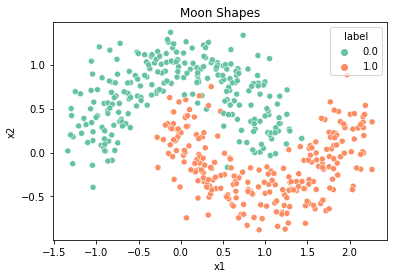

In [36]:
X_moons, y_moons = make_moons(500, noise=0.3, random_state=123)
df = pd.DataFrame(np.concatenate([X_moons, np.expand_dims(y_moons, 1)], axis=1), columns=['x1', 'x2', 'label'])
sns.scatterplot(data=df, x='x1', y='x2', hue='label', palette=sns.color_palette('Set2', n_colors=2))
plt.title('Moon Shapes');

### K nearest neighbours

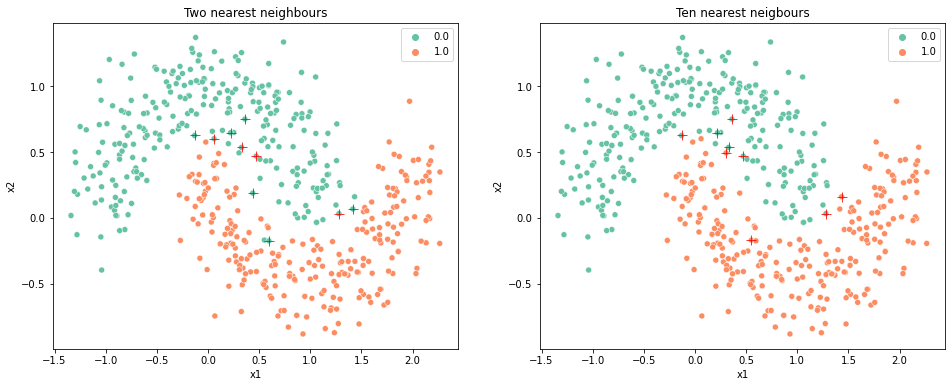

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier_2 = KNeighborsClassifier(n_neighbors=2)
classifier_10 = KNeighborsClassifier(n_neighbors=10)
classifier_2.fit(X=df[['x1', 'x2']], y=df.label)
classifier_10.fit(X=df[['x1', 'x2']], y=df.label)
pred_2 = classifier_2.predict(df[['x1', 'x2']])
pred_10 = classifier_10.predict(df[['x1', 'x2']])
f, (ax1, ax2) = plt.subplots(ncols=2, figsize=[16, 6])
sns.scatterplot(data=df, x='x1', y='x2', hue=pred_2, palette=sns.color_palette('Set2', n_colors=2), ax=ax1)
sns.scatterplot(data=df.loc[df.label != pred_2], x='x1', y='x2', marker='+', color='r', s=100, ax=ax1)
sns.scatterplot(data=df, x='x1', y='x2', hue=pred_10, palette=sns.color_palette('Set2', n_colors=2), ax=ax2)
sns.scatterplot(data=df.loc[df.label != pred_10], x='x1', y='x2', marker='+', color='r', s=100, ax=ax2)
ax1.set_title("Two nearest neighbours")
ax2.set_title("Ten nearest neigbours")
plt.legend();

### Random forest

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict

number_trees = 20
X=df[['x1', 'x2']]
y=df.label
clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=number_trees)
# clf.fit(X, y)
tree_predict = cross_val_predict(clf, X, y)
# recall = cross_val_score(clf, X, y, cv=10, scoring="recall")

<AxesSubplot:xlabel='x1', ylabel='x2'>

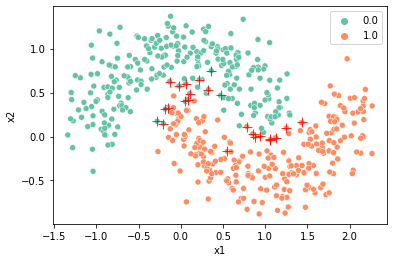

In [66]:
sns.scatterplot(data=df, x='x1', y='x2', hue=tree_predict, palette=sns.color_palette('Set2', n_colors=2))
sns.scatterplot(data=df.loc[df.label != tree_predict], x='x1', y='x2', marker='+', color='r', s=100)

### Evaluation (copy)

In [ ]:
def classification_terms(y, pred):
    # True Positive, True Negative, False Pasitive, False Negative
    y = np.asarray(y)
    pred = np.asarray(pred)
    assert len(y) == len(pred)
    total = len(y)
    TP = ((y==pred) * (pred==1)).sum()
    TN = ((y==pred) * (pred==0)).sum()
    FP = ((y!=pred) * (pred==1)).sum()
    FN = ((y!=pred) * (pred==0)).sum()
    assert TP+TN+FP+FN == len(y)
    return TP, TN, FP, FN

def classification_metrics(TP, TN, FP, FN, verbose=False):
    accuracy = (TP+TN) / (TP+TN+FP+FN)  # What fraction of my prediction is truthfull?
    precision = TP / (TP+FP) if TP+FP > 0 else np.nan  # What fraction of positive predictions is really positive?
    recall = TP / (TP+FN) if TP+FN > 0 else np.nan  # What fraction of positive conditions do I find? (sensitivity)
    negative_precision = TN / (TN+FN) if TN+FN > 0 else np.nan
    specifity = TN / (TN+FP) if TN+FP > 0 else np.nan # What fraction of negative conditions do I find? == negative recall
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else np.nan # Harmonic mean of precision and recall
    f1_negative = 2 * (negative_precision * specifity) / (negative_precision + specifity) if negative_precision + specifity > 0 else np.nan # Harmonic mean of precision and recall
    if verbose:
        return accuracy, precision, recall, negative_precision, specifity, f1, f1_negative
    return accuracy, precision, recall, f1